# Imports

In [2]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
from scipy import signal

import gspread as gs

font = {'family' : 'sans-serif',
        'size'   : 20}

plt.rc('font', **font)
saveDir = '/Users/alexgonzalez/Google Drive/PostDoc/Data/Results/Behavior/'

# Learning Curves

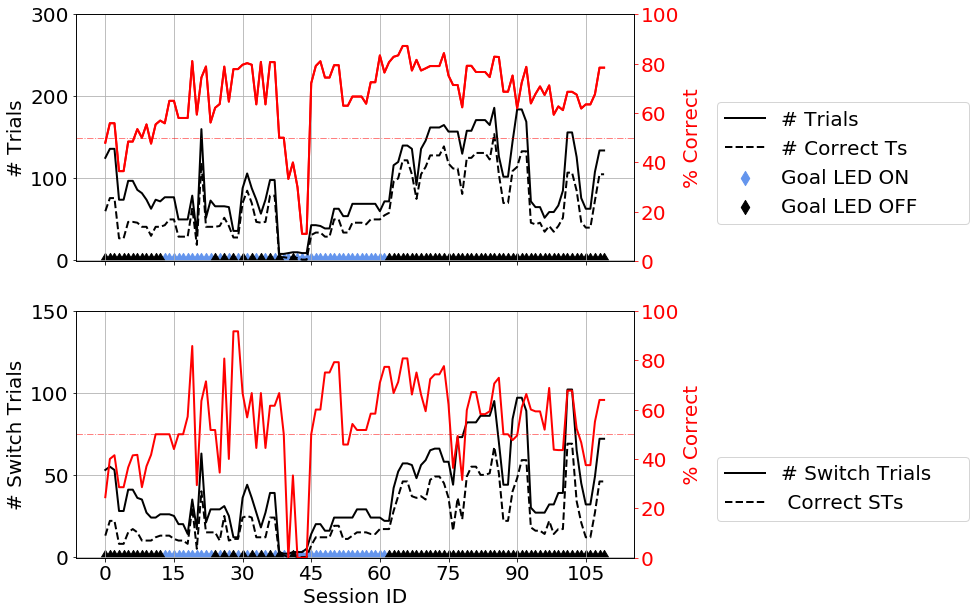

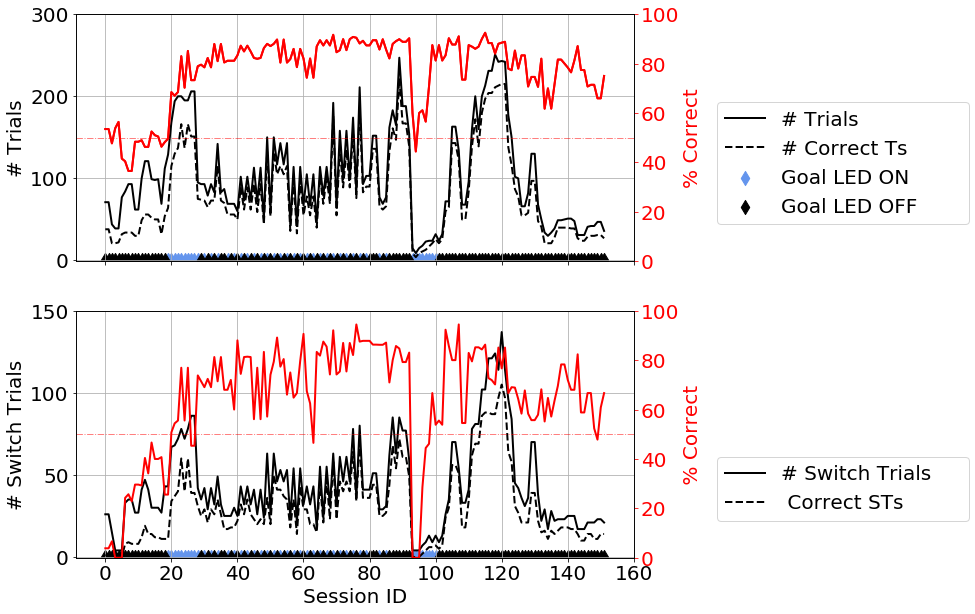

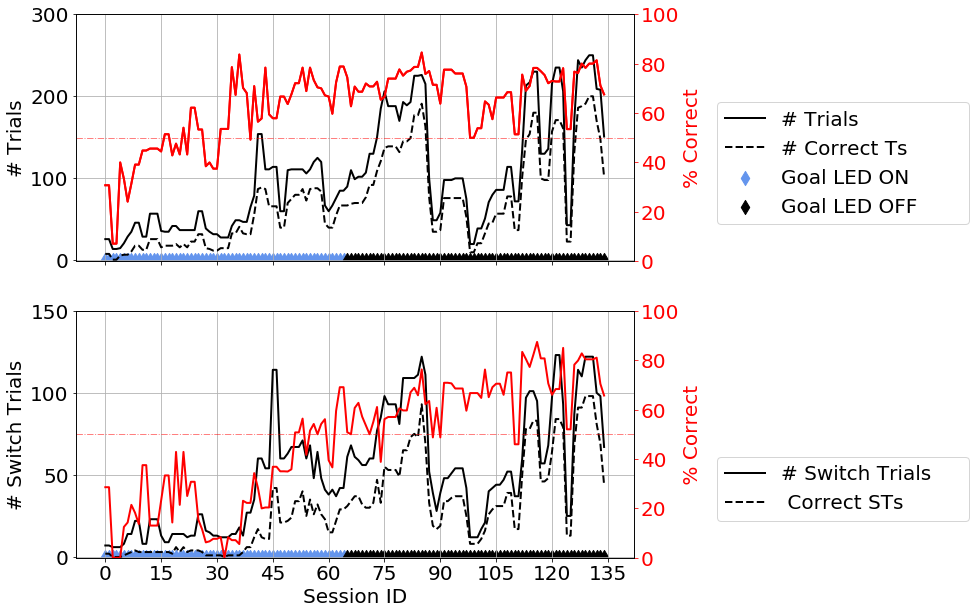

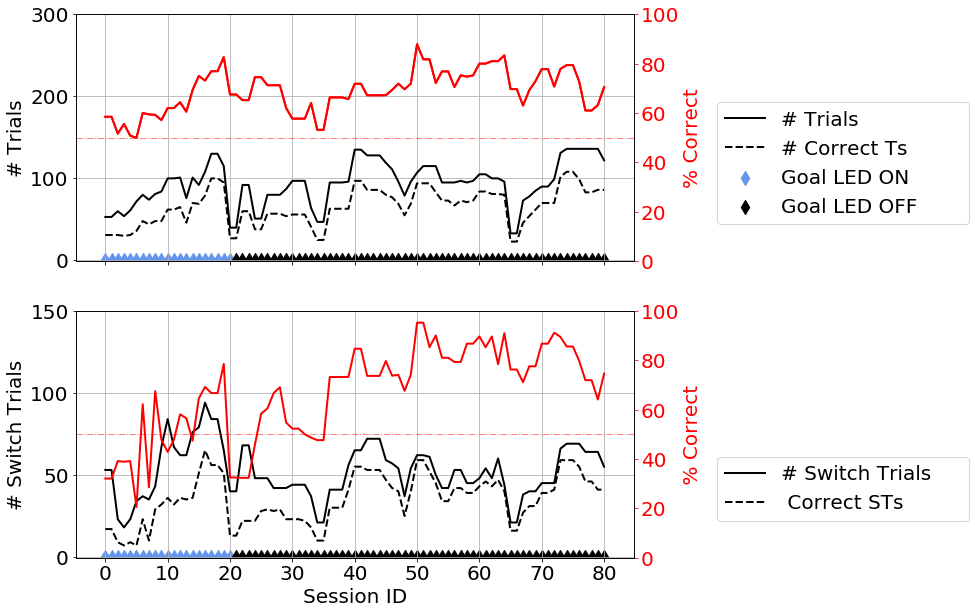

In [16]:
subjIDs = ['Li','Ne','Al','Cl']
#subjIDs = ['Li','Al','Cl']
saveDir = '/Users/alexgonzalez/Google Drive/PostDoc/Data/Results/Behavior/'


#startIDs = [1,2,1,1,]
#endIDs = [118,139,83]
startIDs = [1,1,2,1,]
endIDs = [118,184,139,83]

xTickSize = 100
cnt=0
for subj in subjIDs:
#for subj in ['Cl']:

    df = pd.read_excel("MazePerformance.xlsx",sheet_name=subj)
    df= df[df.Experiment.isin(['T3g','T3h'])]
    x=df.loc[startIDs[cnt]:endIDs[cnt],['Experiment','Num Trials','Num Correct Trials','Num Switches','Num Correct Switches']]
    
    x = x.reset_index(drop=True)
    x=x.apply(pd.to_numeric, errors='ignore')
    
    #nAvg =1
    #y=x.rolling(nAvg,center=True).sum()/nAvg
    #y
    
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10), sharex=True)
    
    nt=x['Num Trials'].copy()
    nct=x['Num Correct Trials'].copy()
    nt2=signal.medfilt(nt)
    nct2=signal.medfilt(nct)
    
    yg=nt.copy()
    yg[x.Experiment=='T3h']=float('nan')
    yg[yg>1]=0
    yh=nt.copy()
    yh[x.Experiment=='T3g']=float('nan')
    yh[yh>1]=0
    
    pl_nt = ax1.plot(nt2,'k-',linewidth=2)
    pl_nct = ax1.plot(nct2,'k--',linewidth=2)
    ax1.grid(True)
  
    ax1.set(ylim=(-1,300))
    ax1.set_ylabel('# Trials')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    ## second axis for %
    pc=nct2/nt2*100
    ax1b = ax1.twinx()
    pl_pc = ax1b.plot(pc,color='r',linewidth=2)
    ax1b.plot(pc,color='r',linewidth=2)
    ax1b.axhline(y=50,color='r',linestyle='-.',linewidth=1,alpha=0.5)
    
    ax1b.set(ylim=(0,100))
    ax1b.set_ylabel('% Correct',color='r')
    ax1b.tick_params('y', colors='r')
    pl_hid=ax1.scatter(yh.index,yh, marker='d',color='cornflowerblue',s=xTickSize)
    pl_gid=ax1.scatter(yg.index,yg, marker='d',color='k',s=xTickSize)
    
    ax1.legend(["# Trials","# Correct Ts","Goal LED ON","Goal LED OFF"],
              bbox_to_anchor=(1.15, 0.15, 0.45, 1.), loc=3,mode="expand", borderaxespad=0.)
    
    ##### Switch Plots #####
    nst=x['Num Switches'].copy()
    ncst=x['Num Correct Switches'].copy()
    nst2=signal.medfilt(nst)
    ncst2=signal.medfilt(ncst)
  
    pl_nst = ax2.plot(nst2,'k-',linewidth=2)
    pl_ncst = ax2.plot(ncst2,'k--',linewidth=2)
    ax2.grid(True)
    
    ax2.set(ylim=(-0.5,150))
    ax2.set_ylabel('# Switch Trials')
    
    ax2.set_xlabel('Session ID')
    
    ## second axis for Num Correct Switches
    ecst = (nct2/nt2)*((nct2-1)/(nt2-1))*nst2
    psct = ncst2/nst2*100
   
    ax2b = ax2.twinx()
    
    #pl_ecst = ax2.plot(ecst,'-',color='grey',linewidth=2)
    #pl_cstdif = ax2b.plot(ncst-ecst,color='r',linewidth=2)
    #ax2b.set(ylim=(-12,12))
    #ax2b.set_ylabel('#CSTs-E[#CSTs])',color='r')
    #ax2b.axhline(y=0,color='r',linestyle='-.',linewidth=1,alpha=0.5)
    pl_cstdif = ax2b.plot(psct,color='r',linewidth=2)
    ax2b.set(ylim=(0,100))
    ax2b.axhline(y=50,color='r',linestyle='-.',linewidth=1,alpha=0.5)
    ax2b.set_ylabel(' % Correct ',color='r')
    ax2b.tick_params('y', colors='r')
    
    pl_hid = ax2.scatter(yh.index,yh, marker='d',color='cornflowerblue',s=xTickSize)
    pl_gid = ax2.scatter(yg.index,yg, marker='d',color='k',s=xTickSize)

    ax2.legend(["# Switch Trials"," Correct STs"],
               bbox_to_anchor=(1.15, 0.15, 0.45, 1.), loc=3,mode="expand", borderaxespad=0.)
#     ax2.legend(["# Switch Trials","# Correct STs","# Expected CSTs"],
#               bbox_to_anchor=(1.15, 0.15, 0.45, 1.), loc=3,mode="expand", borderaxespad=0.)

#     plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)
    f.savefig(saveDir+subj+'BehavPerf_Smooth.pdf',bbox_inches='tight')
    cnt+=1
    

In [12]:
 nt=x['Num Trials'].copy()
nct=x['Num Correct Trials'].copy()
nt2=signal.medfilt(nt)
nct2=signal.medfilt(nct)

In [13]:
nt2

array([ 53.,  53.,  60.,  54.,  61.,  72.,  80.,  74.,  81.,  84., 100.,
       100., 101.,  76., 101.,  92., 108., 130., 130., 115.,  40.,  40.,
        92.,  92.,  51.,  51.,  80.,  80.,  80.,  87.,  97.,  97.,  97.,
        64.,  47.,  47.,  95.,  95.,  95.,  96., 135., 135., 128., 128.,
       128., 119., 111.,  96.,  79.,  96., 107., 115., 115., 115.,  95.,
        95.,  95.,  97.,  95.,  97., 105., 105., 100., 100.,  96.,  33.,
        33.,  73.,  78.,  85.,  90.,  90.,  99., 131., 136., 136., 136.,
       136., 136., 136., 122.])

In [11]:
x
y=x.apply(signal.medfilt,args=(5,))

In [12]:
y

,Experiment,Num Trials,Num Correct Trials,Num Switches,Num Correct Switches
0,T3h,52.0,23.0,3.0,0.0
1,T3h,53.0,31.0,23.0,9.0
2,T3h,54.0,31.0,23.0,9.0
3,T3h,60.0,31.0,23.0,9.0
4,T3h,61.0,31.0,23.0,7.0
5,T3h,72.0,36.0,34.0,9.0
6,T3h,74.0,44.0,35.0,10.0
7,T3h,80.0,48.0,37.0,23.0
8,T3h,81.0,48.0,43.0,29.0
9,T3h,84.0,51.0,67.0,32.0


In [ ]:
subjIDs = ['Li','Ne','Al','Cl']
saveDir = '/Users/alexgonzalez/Google Drive/PostDoc/Data/Results/Behavior/'

startIDs = [1,1,2,1,]
endIDs = [118,184,139,83]

xTickSize = 100
cnt=0
#for subj in subjIDs:
for subj in ['Cl']:

    df = pd.read_excel("MazePerformance.xlsx",sheet_name=subj)
    df= df[df.Experiment.isin(['T3g','T3h'])]
    x=df.loc[startIDs[cnt]:endIDs[cnt],['Experiment','Num Trials','Num Correct Trials','Num Switches','Num Correct Switches']]
    
    x = x.reset_index(drop=True)
    x=x.apply(pd.to_numeric, errors='ignore')
    x=x.apply(signal.medfilt,args=(5,))
    #nAvg =1
    #y=x.rolling(nAvg,center=True).sum()/nAvg
    #y
    
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10), sharex=True)
    
    nt=x['Num Trials'].copy()
    nct=x['Num Correct Trials'].copy()
    
    yg=nt.copy()
    yg[x.Experiment=='T3h']=float('nan')
    yg[yg>1]=0
    yh=nt.copy()
    yh[x.Experiment=='T3g']=float('nan')
    yh[yh>1]=0
    
    pl_nt = ax1.plot(nt,'k-',linewidth=2)
    pl_nct = ax1.plot(nct,'k--',linewidth=2)
    ax1.grid(True)
  
    ax1.set(ylim=(-1,300))
    ax1.set_ylabel('# Trials')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    ## second axis for %
    pc=nct/nt*100
    ax1b = ax1.twinx()
    pl_pc = ax1b.plot(pc,color='r',linewidth=2)
    ax1b.plot(pc,color='r',linewidth=2)
    ax1b.axhline(y=50,color='r',linestyle='-.',linewidth=1,alpha=0.5)
    
    ax1b.set(ylim=(0,100))
    ax1b.set_ylabel('% Correct',color='r')
    ax1b.tick_params('y', colors='r')
    pl_hid=ax1.scatter(yh.index,yh, marker='d',color='cornflowerblue',s=xTickSize)
    pl_gid=ax1.scatter(yg.index,yg, marker='d',color='k',s=xTickSize)
    
    ax1.legend(["# Trials","# Correct Ts","Goal LED ON","Goal LED OFF"],
              bbox_to_anchor=(1.15, 0.15, 0.45, 1.), loc=3,mode="expand", borderaxespad=0.)
    
    ##### Switch Plots #####
    nst=x['Num Switches'].copy()
    ncst=x['Num Correct Switches'].copy()
    
    pl_nst = ax2.plot(nst,'k-',linewidth=2)
    pl_ncst = ax2.plot(ncst,'k--',linewidth=2)
    ax2.grid(True)
    
    ax2.set(ylim=(-0.5,150))
    ax2.set_ylabel('# Switch Trials')
    
    ax2.set_xlabel('Session ID')
    
    ## second axis for Num Correct Switches
    ecst = (nct/nt)*((nct-1)/(nt-1))*nst
    psct = ncst/nst*100
   
    ax2b = ax2.twinx()
    
    #pl_ecst = ax2.plot(ecst,'-',color='grey',linewidth=2)
    #pl_cstdif = ax2b.plot(ncst-ecst,color='r',linewidth=2)
    #ax2b.set(ylim=(-12,12))
    #ax2b.set_ylabel('#CSTs-E[#CSTs])',color='r')
    #ax2b.axhline(y=0,color='r',linestyle='-.',linewidth=1,alpha=0.5)
    pl_cstdif = ax2b.plot(psct,color='r',linewidth=2)
    ax2b.set(ylim=(0,100))
    ax2b.axhline(y=50,color='r',linestyle='-.',linewidth=1,alpha=0.5)
    ax2b.set_ylabel(' % Correct ',color='r')
    ax2b.tick_params('y', colors='r')
    
    pl_hid = ax2.scatter(yh.index,yh, marker='d',color='cornflowerblue',s=xTickSize)
    pl_gid = ax2.scatter(yg.index,yg, marker='d',color='k',s=xTickSize)

    ax2.legend(["# Switch Trials"," Correct STs"],
               bbox_to_anchor=(1.15, 0.15, 0.45, 1.), loc=3,mode="expand", borderaxespad=0.)
#     ax2.legend(["# Switch Trials","# Correct STs","# Expected CSTs"],
#               bbox_to_anchor=(1.15, 0.15, 0.45, 1.), loc=3,mode="expand", borderaxespad=0.)

#     plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)
    #f.savefig(saveDir+subj+'BehavPerf_2.pdf',bbox_inches='tight')
    cnt+=1
    

In [26]:
x

,Experiment,Num Trials,Num Correct Trials,Num Switches,Num Correct Switches
0,T3h,53,31,53,17
1,T3h,60,33,58,19
2,T3h,52,23,3,0
3,T3h,61,31,23,9
4,T3h,54,30,18,7
5,T3h,80,48,37,23
6,T3h,72,36,34,5
7,T3h,81,51,43,29
8,T3h,74,44,35,10
9,T3h,84,48,84,36
